In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
#storing the file path/ url path in a variable
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"

#make dataframe of the data
df0 = pd.read_csv(url)
print('Dataset imported')

Dataset imported


In [3]:
df0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### checking shape & datatypes of the columns in data...

In [35]:
print(df0.shape)
print(' ')
print(df0.dtypes)

(7043, 21)
 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### this dataset contains 7043 rows and 21 columns, in which 18 are of object datatypes , 2 are of int datatypes and  monthly charges is of float datatype. Total charges should also been float datatype but it is showing as object, we will check it later.  

In [5]:
df0.shape

(7043, 21)

In [6]:
df0.duplicated().sum()

0

### having no duplicate

## checking null values

In [7]:
#total missing values
df0.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### it is showing zero null values, that's good for us.

In [8]:
df0[df0 ==0].count()

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

### SeniorCitizen column is having 5901 zeroes value and tenure is having 11 zeroes value. we will check it later 

In [9]:
df0.select_dtypes(np.number)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [10]:
df0.select_dtypes('object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


### from the above table we can clearly analyze that "SeniorCitizen" cloumn is containing countinuous data but it has been shown as categorical data, we should change its datatype to numerical datatype. 

In [17]:
df0["TotalCharges"]=pd.to_numeric(df0['TotalCharges'], errors='coerce')

In [18]:
df0.select_dtypes(np.number)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [13]:
df0.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [14]:
df0['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

### its look likes "SeniorCitizen" data is already encoded.

In [25]:
df0.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### TotalCharges column contain 11 null values. we will handle it later

In [27]:
df0[df0['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## filling the null values from total charges column

In [28]:
df1=df0.copy()

In [30]:
df1["TotalCharges"].fillna(df1["TotalCharges"].mean(), inplace=True)

In [33]:
df1['TotalCharges'].isnull().sum()

0

###  droping the customerID column because it is not helpfull and churning of any customer can't be predicted from his ID or his Name

In [34]:
df1.drop(columns='customerID', inplace=True)

In [36]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [37]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Observation
1. SeniorCitizen contains only 0 and 1 data.
2. Tenure also has it minimum value as 0 and maximum as 72.
3. Monthly charges varies from 18 to 118 units, with an average of 65(approx).
4. Total charges contain its maximum unit as 8684 and minimum as 18 unit only. 

# Data Visualization

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy.stats
from scipy.stats import skew

## 1.

Text(0.5, 1.0, '% of Churning')

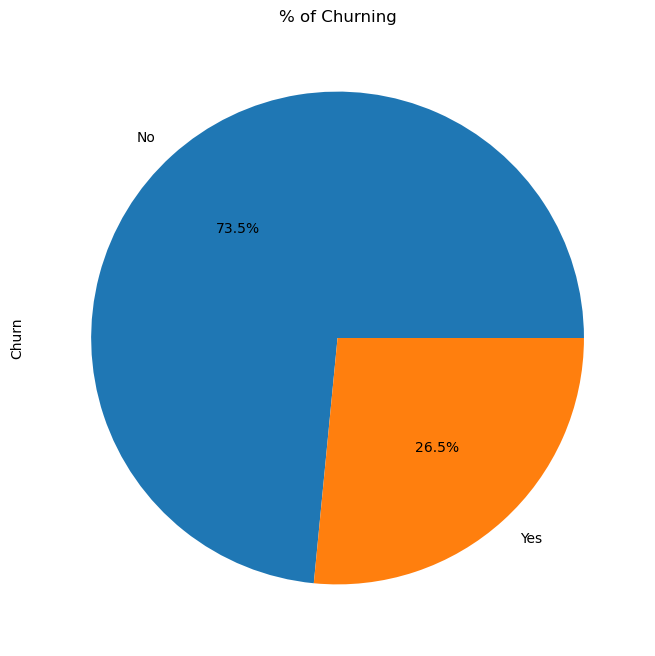

In [45]:
df1['Churn'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Churning")

### In the given data 73.5% people have not churned and only 26.5% have churned

## 2.

<AxesSubplot:xlabel='Churn', ylabel='count'>

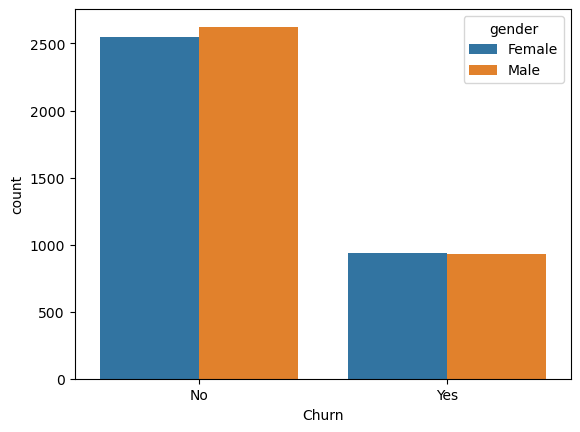

In [46]:
sns.countplot("Churn", data=df1,hue="gender")

### In the both cases male and female have equal numbers.

## 3.

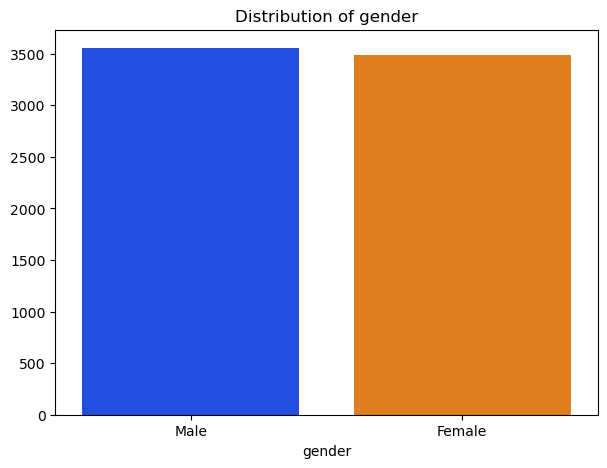

Male      50.48 %
Female    49.52 %
Name: gender, dtype: object

In [44]:
# Creating a barplot for 'gender'
gender= df1["gender"].value_counts()

plt.style.use('default')
plt.figure(figsize=(7,5))
sns.barplot(gender.index,gender.values, palette='bright')
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.tick_params(labelsize=10)
plt.show()

gender = df1['gender'].value_counts(normalize=True)
round(gender * 100, 2).astype('str') + ' %'

### Number of male and female are nearly equal.

## 4.

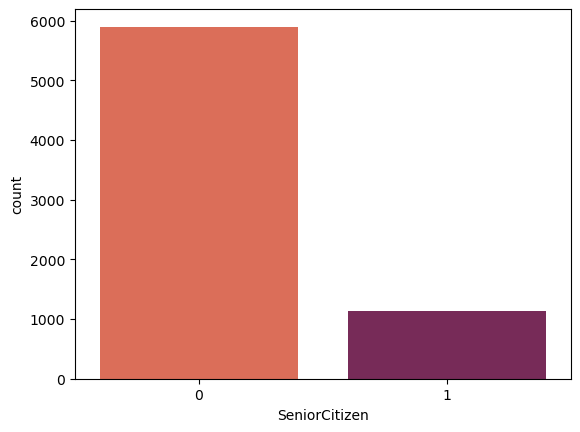

0    83.79 %
1    16.21 %
Name: SeniorCitizen, dtype: object

In [51]:
sns.countplot(x='SeniorCitizen',data=df1,palette='rocket_r')
plt.show()
SeniorCitizen = df1['SeniorCitizen'].value_counts(normalize=True)
round(SeniorCitizen * 100, 2).astype('str') + ' %'

### Most people are not senior citizen in this dataset

## 5.

<AxesSubplot:xlabel='Churn', ylabel='count'>

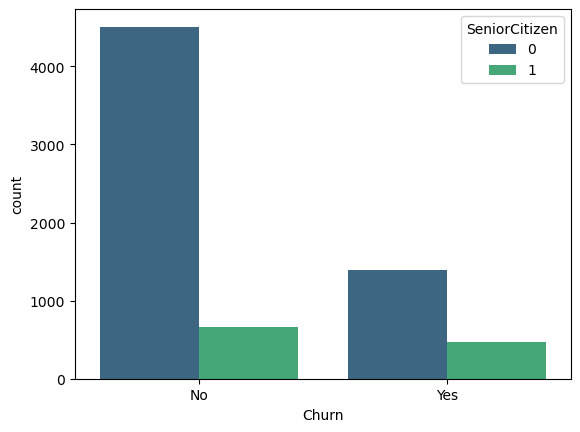

In [52]:
sns.countplot("Churn", data=df1,hue="SeniorCitizen",palette='viridis')

### Maximum number of people who have not churned are belong to younger citizen (not senior citizen) 

## 6.

<AxesSubplot:xlabel='Churn', ylabel='count'>

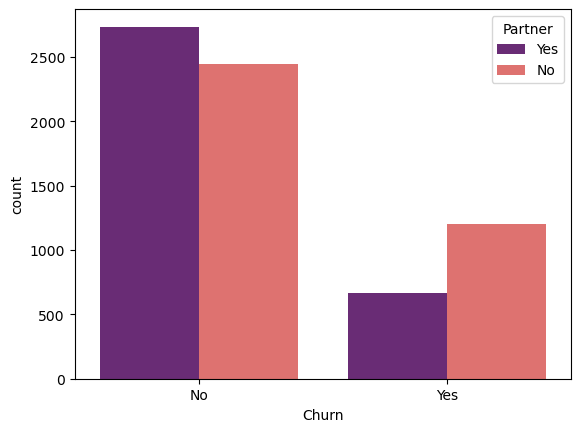

In [53]:
sns.countplot("Churn", data=df1,hue="Partner",palette='magma')

### it shows people having no partner are more likely to continue their services.  

## 7.

<AxesSubplot:xlabel='Churn', ylabel='count'>

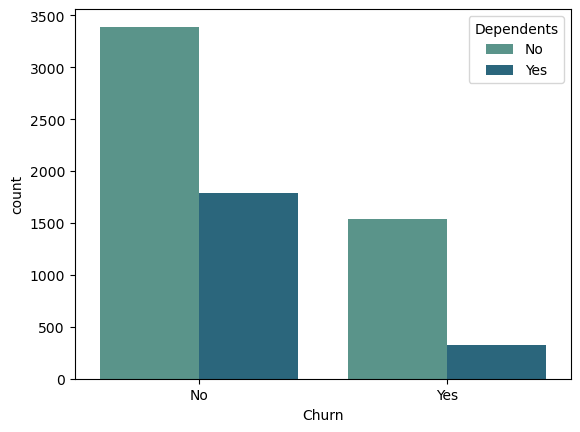

In [54]:
sns.countplot("Churn", data=df1,hue="Dependents",palette='crest')

### maximum independent people are not likely to churn

In [58]:
def get_uniques(df1, columns):
    return {column: list(df1[column].unique()) for column in columns}

In [59]:
def get_categorical_columns(df1):
    return [column for column in df1.columns if df1.dtypes[column] == 'object']

In [60]:
get_uniques(df1, get_categorical_columns(df1))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

### observation:
1. MultipleLines column have 3 types of value :'No phone service','No' and 'Yes', in which 'no phone service' and 'no' indicates the same thing, so we try to replace 'no phone service' to 'no'.
2. OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies, in these columns 'No internet service' and 'no' refers to the same point so we will replace one of these to other. 

In [63]:
df1['MultipleLines'] = df1['MultipleLines'].replace('No phone service', 'No')

df1[['OnlineSecurity','OnlineBackup',
      'DeviceProtection','TechSupport', 'StreamingTV',
      'StreamingMovies']] = df1[['OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [64]:
get_uniques(df1, get_categorical_columns(df1))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

### Above observations have been corrected here.

## 7.

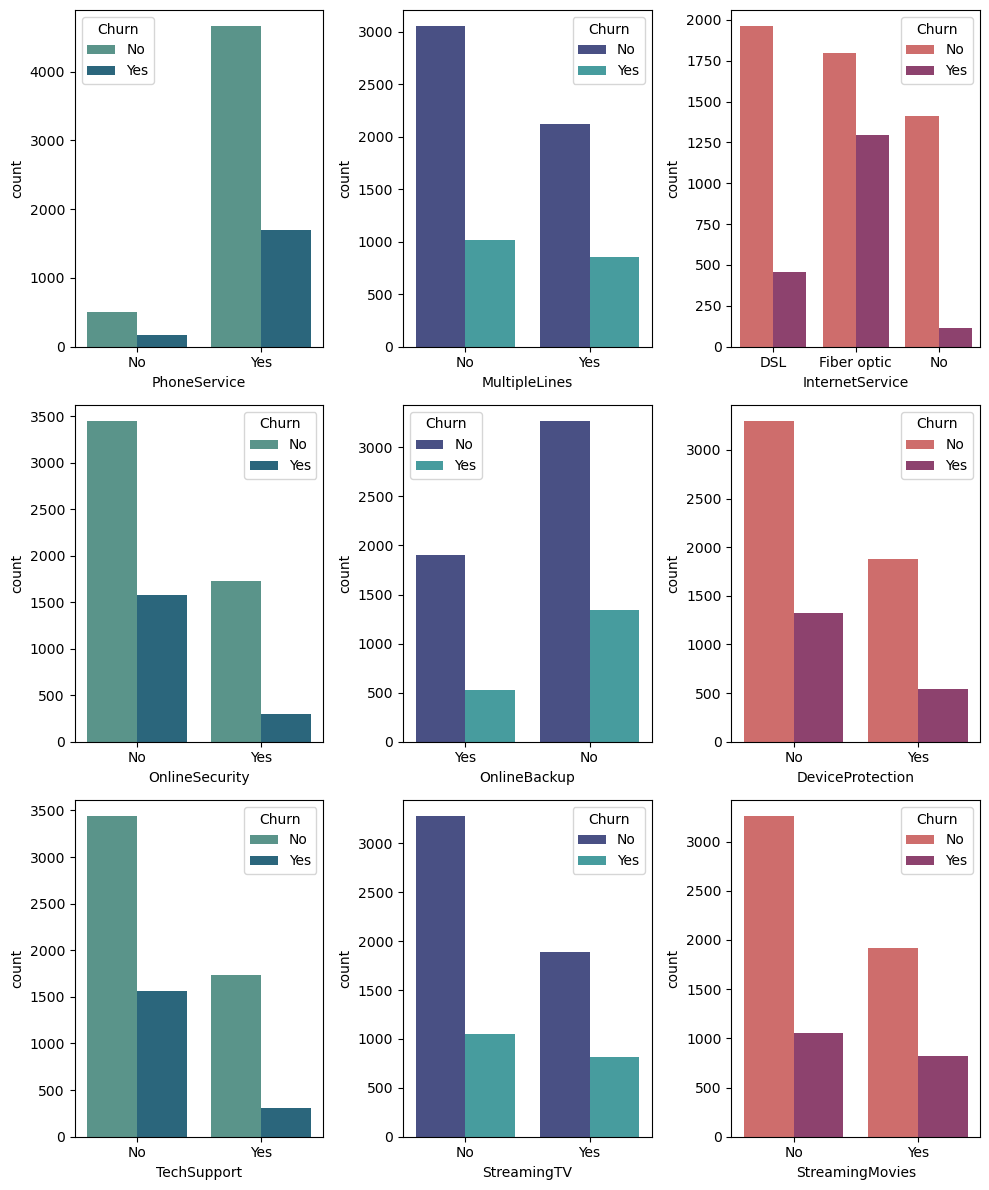

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,12))

sns.countplot(x="PhoneService", hue="Churn", data=df1, ax=axes[0,0],palette='crest')
sns.countplot(x="MultipleLines", hue="Churn", data=df1, ax=axes[0,1],palette='mako')
sns.countplot(x="InternetService", hue="Churn", data=df1, ax=axes[0,2],palette='flare')
sns.countplot(x="OnlineSecurity", hue="Churn", data=df1, ax=axes[1,0],palette='crest')
sns.countplot(x="OnlineBackup", hue="Churn", data=df1, ax=axes[1,1],palette='mako')
sns.countplot(x="DeviceProtection", hue="Churn", data=df1, ax=axes[1,2],palette='flare')
sns.countplot(x="TechSupport", hue="Churn", data=df1, ax=axes[2,0],palette='crest')
sns.countplot(x="StreamingTV", hue="Churn", data=df1, ax=axes[2,1],palette='mako')
sns.countplot(x="StreamingMovies", hue="Churn", data=df1, ax=axes[2,2],palette='flare')

plt.tight_layout()
plt.show()

### All plot indicates the same thing; number not churning people is more in every categories except "phone services " column  

## 8.

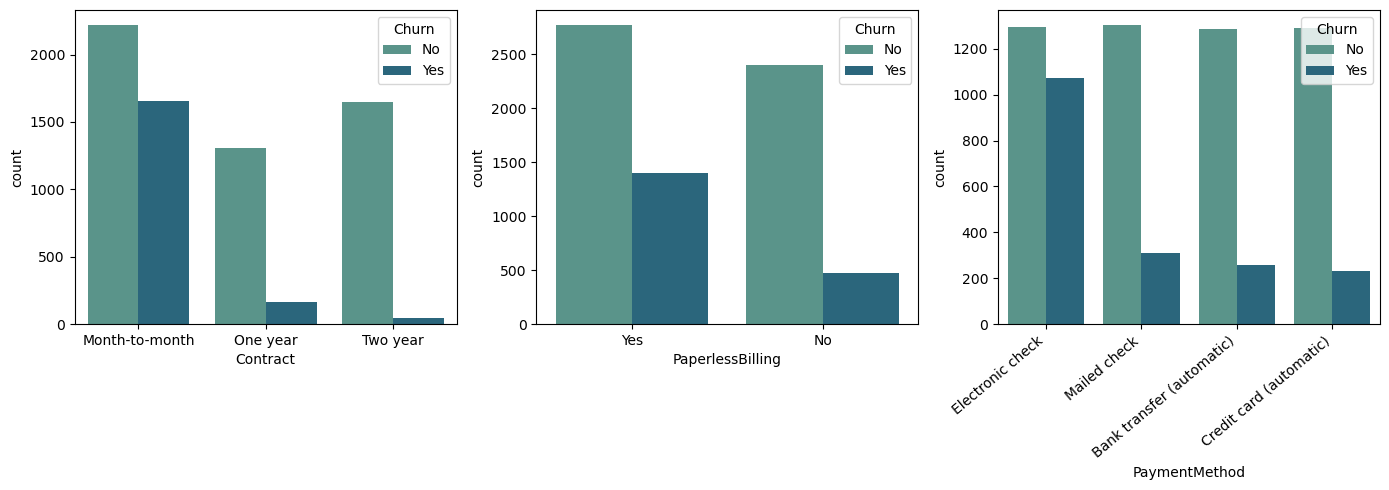

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="Contract", hue="Churn", data=df1, ax=axes[0],palette='crest')
sns.countplot(x="PaperlessBilling", hue="Churn", data=df1, ax=axes[1],palette='crest')
sns.countplot(x="PaymentMethod", hue="Churn", data=df1, ax=axes[2],palette='crest')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

### observation:
1. people having month to month contract are more likely to churn.
2. in both cases maximum number of people are those who have choosen to not churn
3. in payment method; maximum people have churned are belong to electronic check.

## 9.

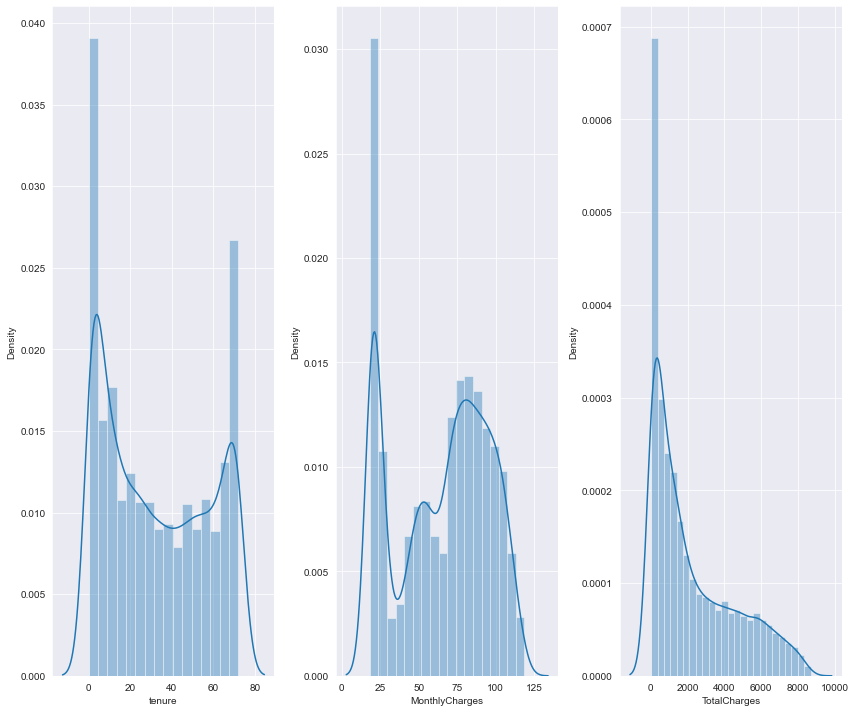

In [86]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(12,10))
for column in df1[['tenure','MonthlyCharges','TotalCharges']].columns:
    plt.subplot(1,3,i+1)
    sns.distplot(df1[column],kde=True)
    plt.xlabel(column,fontsize=10)
    i+=1
    
plt.tight_layout()
plt.show()

### these 3 numerical data have not distributed well, we will perform the transformation method and will check it again.

## 10.

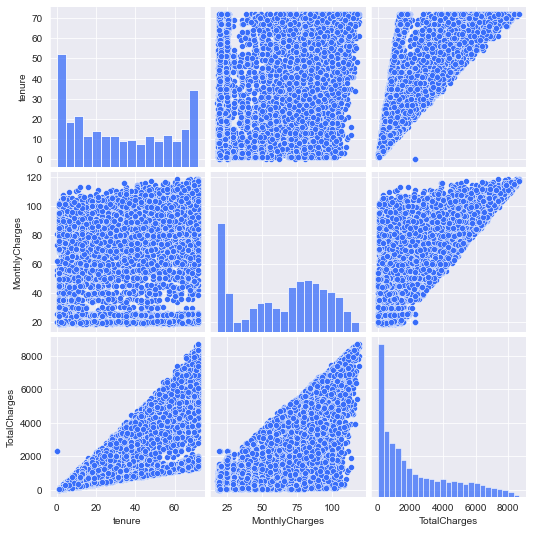

In [91]:
sns.set_palette('rainbow')
sns.pairplot(df1[['tenure','MonthlyCharges','TotalCharges']])

# checking outlier

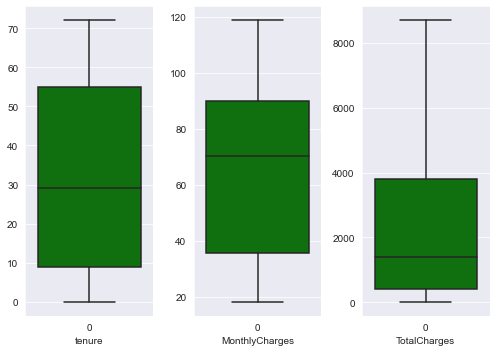

In [92]:
collist=df1[['tenure','MonthlyCharges','TotalCharges']].columns.values

plt.figure(figsize=(7,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df1[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## no outlier presented in these data.

In [94]:
df2=df1.copy()

# checking skewness

In [93]:
import scipy.stats
from scipy.stats import skew

In [100]:
df2[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [103]:
df2['TotalCharges']=np.log1p(df2['TotalCharges'])

In [104]:
df2[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -1.178189
dtype: float64

## skewness have reduced from totalcharges column

In [105]:
df3=df2.copy()

# Checking Correlation & Multicollinearity

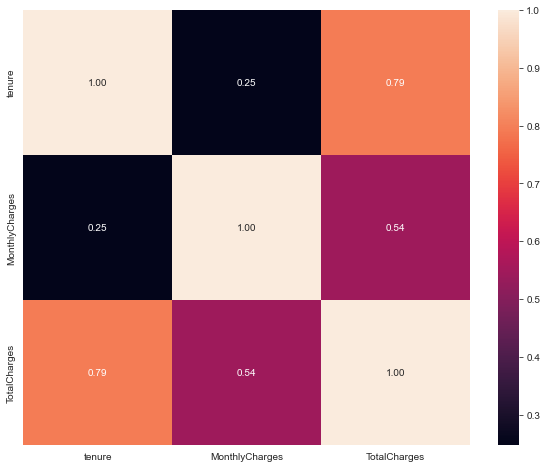

In [106]:
#Heatmap of numerical columns
plt.figure(figsize = (10, 8))
sns.heatmap(df3[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True, fmt = ".2f")
plt.show()

# data encoding

In [107]:
from sklearn import preprocessing

## 1.using Label encoder

In [108]:
columns=['gender','Partner','Dependents','PhoneService','MultipleLines',
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
         'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for x in columns:
    df3[x]=preprocessing.LabelEncoder().fit_transform(df3[x])
    
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,1.480737,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,2.145237,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1.737571,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,2.142173,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1.795349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,2.151313,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,2.292960,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,1.923918,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,1.905913,1


In [119]:
df4=df3.copy()

## 2.using Ordinal encoder

In [121]:
columns=[['InternetService','Contract']]
for x in columns:
    df4[x]=preprocessing. OrdinalEncoder().fit_transform(df4[x])
    
df4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0.0,0,1,0,0,0,0,0.0,1,Electronic check,29.85,1.480737,0
1,1,0,0,0,34,1,0,0.0,1,0,1,0,0,0,1.0,0,Mailed check,56.95,2.145237,0
2,1,0,0,0,2,1,0,0.0,1,1,0,0,0,0,0.0,1,Mailed check,53.85,1.737571,1
3,1,0,0,0,45,0,0,0.0,1,0,1,1,0,0,1.0,0,Bank transfer (automatic),42.30,2.142173,0
4,0,0,0,0,2,1,0,1.0,0,0,0,0,0,0,0.0,1,Electronic check,70.70,1.795349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0.0,1,0,1,1,1,1,1.0,1,Mailed check,84.80,2.151313,0
7039,0,0,1,1,72,1,1,1.0,0,1,1,0,1,1,1.0,1,Credit card (automatic),103.20,2.292960,0
7040,0,0,1,1,11,0,0,0.0,1,0,0,0,0,0,0.0,1,Electronic check,29.60,1.923918,0
7041,1,1,1,0,4,1,1,1.0,0,0,0,0,0,0,0.0,1,Mailed check,74.40,1.905913,1


In [122]:
df5=df4.copy()

In [123]:
df5

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0.0,0,1,0,0,0,0,0.0,1,Electronic check,29.85,1.480737,0
1,1,0,0,0,34,1,0,0.0,1,0,1,0,0,0,1.0,0,Mailed check,56.95,2.145237,0
2,1,0,0,0,2,1,0,0.0,1,1,0,0,0,0,0.0,1,Mailed check,53.85,1.737571,1
3,1,0,0,0,45,0,0,0.0,1,0,1,1,0,0,1.0,0,Bank transfer (automatic),42.30,2.142173,0
4,0,0,0,0,2,1,0,1.0,0,0,0,0,0,0,0.0,1,Electronic check,70.70,1.795349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0.0,1,0,1,1,1,1,1.0,1,Mailed check,84.80,2.151313,0
7039,0,0,1,1,72,1,1,1.0,0,1,1,0,1,1,1.0,1,Credit card (automatic),103.20,2.292960,0
7040,0,0,1,1,11,0,0,0.0,1,0,0,0,0,0,0.0,1,Electronic check,29.60,1.923918,0
7041,1,1,1,0,4,1,1,1.0,0,0,0,0,0,0,0.0,1,Mailed check,74.40,1.905913,1


## 3. using onehot encoder (pd.get_dummies)

In [124]:
df5=pd.get_dummies(df4)

In [125]:
df5

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0.0,0,1,...,0,0.0,1,29.85,1.480737,0,0,0,1,0
1,1,0,0,0,34,1,0,0.0,1,0,...,0,1.0,0,56.95,2.145237,0,0,0,0,1
2,1,0,0,0,2,1,0,0.0,1,1,...,0,0.0,1,53.85,1.737571,1,0,0,0,1
3,1,0,0,0,45,0,0,0.0,1,0,...,0,1.0,0,42.30,2.142173,0,1,0,0,0
4,0,0,0,0,2,1,0,1.0,0,0,...,0,0.0,1,70.70,1.795349,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0.0,1,0,...,1,1.0,1,84.80,2.151313,0,0,0,0,1
7039,0,0,1,1,72,1,1,1.0,0,1,...,1,1.0,1,103.20,2.292960,0,0,1,0,0
7040,0,0,1,1,11,0,0,0.0,1,0,...,0,0.0,1,29.60,1.923918,0,0,0,1,0
7041,1,1,1,0,4,1,1,1.0,0,0,...,0,0.0,1,74.40,1.905913,1,0,0,0,1


In [ ]:
df6=df5.copy()

## differentiating the features and label

In [163]:
X = df6.drop('Churn', axis=1)
X


y = df6['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

## scaling the data using StandardScaler

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

## spliting the train and test data

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [167]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((5282, 22), (5282,), (1761, 22), (1761,))

## machine learning model

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [177]:
def model(classifier,X_train,y_train,X_test,y_test):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,X_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

# 1.LogisticRegression

Cross Validation Score :  84.97%
ROC_AUC Score :  71.94%


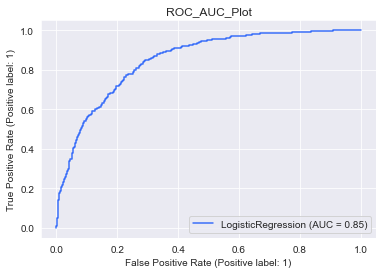

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1284
           1       0.69      0.53      0.60       477

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



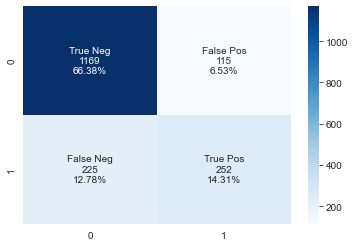

In [180]:
model_lr= LogisticRegression()
model(model_lr,X_train,y_train,X_test,y_test)
model_evaluation(model_lr,X_test,y_test)

# 2.DecisionTreeClassifier

Cross Validation Score :  65.27%
ROC_AUC Score :  63.70%


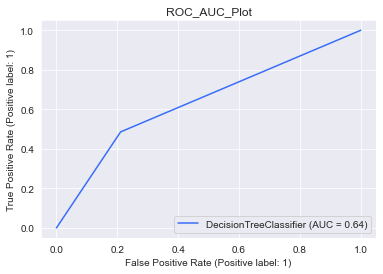

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1284
           1       0.46      0.48      0.47       477

    accuracy                           0.71      1761
   macro avg       0.63      0.64      0.63      1761
weighted avg       0.71      0.71      0.71      1761



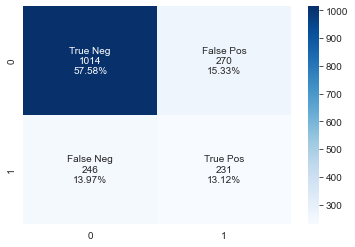

In [182]:
model_dtc = DecisionTreeClassifier()
model(model_dtc,X_train,y_train,X_test,y_test)
model_evaluation(model_dtc,X_test,y_test)

# 3.RandomForestClassifier

Cross Validation Score :  81.96%
ROC_AUC Score :  69.27%


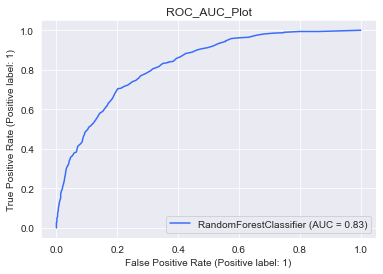

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1284
           1       0.66      0.48      0.55       477

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



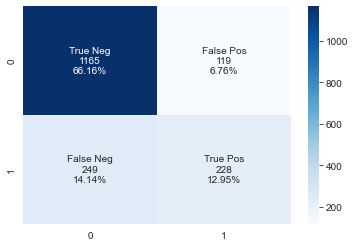

In [183]:
model_rfc=RandomForestClassifier()
model(model_rfc,X_train,y_train,X_test,y_test)
model_evaluation(model_rfc,X_test,y_test)

# 4.ExtraTreesClassifier

Cross Validation Score :  79.11%
ROC_AUC Score :  67.91%


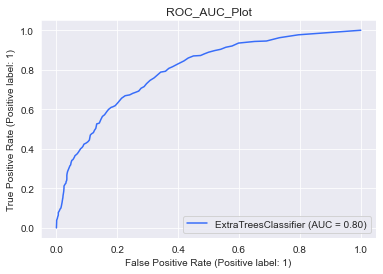

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1284
           1       0.61      0.47      0.53       477

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761



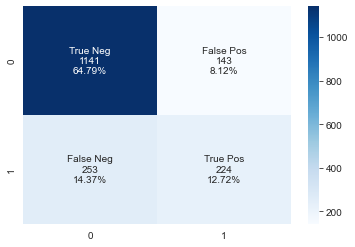

In [184]:
model_etc=ExtraTreesClassifier()
model(model_etc,X_train,y_train,X_test,y_test)
model_evaluation(model_etc,X_test,y_test)

# 5.KNeighborsClassifier

Cross Validation Score :  76.36%
ROC_AUC Score :  65.77%


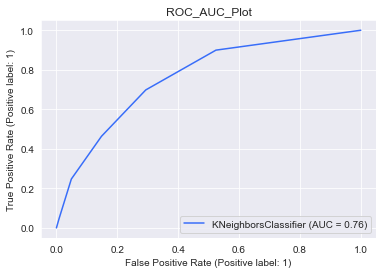

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1284
           1       0.54      0.46      0.50       477

    accuracy                           0.75      1761
   macro avg       0.67      0.66      0.66      1761
weighted avg       0.74      0.75      0.74      1761



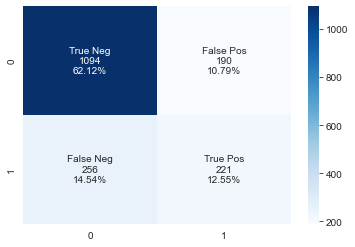

In [185]:
model_knc=KNeighborsClassifier()
model(model_knc,X_train,y_train,X_test,y_test)
model_evaluation(model_knc,X_test,y_test)

# 6.SVC

Cross Validation Score :  80.83%
ROC_AUC Score :  68.62%


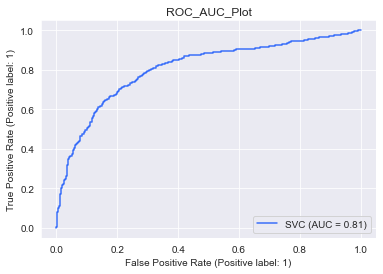

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1284
           1       0.69      0.45      0.54       477

    accuracy                           0.80      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.78      0.80      0.78      1761



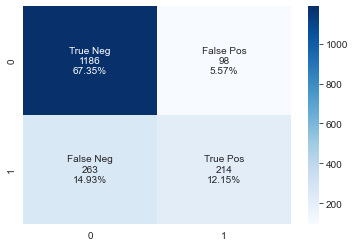

In [186]:
model_svc=SVC()
model(model_svc,X_train,y_train,X_test,y_test)
model_evaluation(model_svc,X_test,y_test)

# 7.GaussianNB

Cross Validation Score :  82.96%
ROC_AUC Score :  74.64%


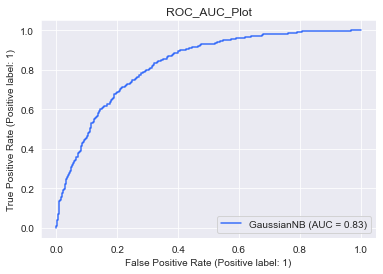

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1284
           1       0.55      0.71      0.62       477

    accuracy                           0.76      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.79      0.76      0.77      1761



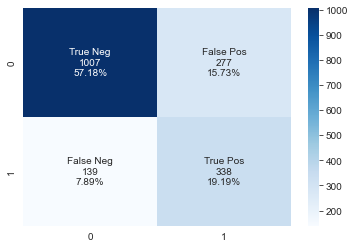

In [187]:
model_gnb=GaussianNB()
model(model_gnb,X_train,y_train,X_test,y_test)
model_evaluation(model_gnb,X_test,y_test)

# 8.AdaBoostClassifier

Cross Validation Score :  84.34%
ROC_AUC Score :  70.57%


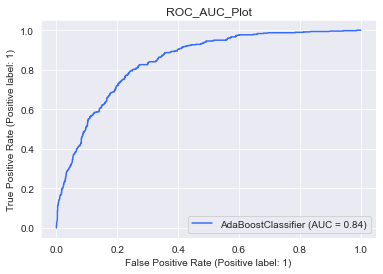

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1284
           1       0.66      0.51      0.57       477

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.78      0.80      0.79      1761



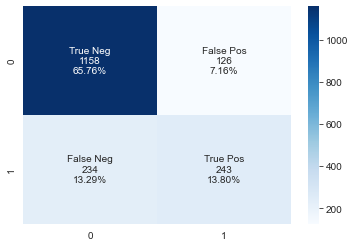

In [188]:
model_abc=AdaBoostClassifier()
model(model_abc,X_train,y_train,X_test,y_test)
model_evaluation(model_abc,X_test,y_test)

# 9.GradientBoostingClassifier

Cross Validation Score :  84.25%
ROC_AUC Score :  71.32%


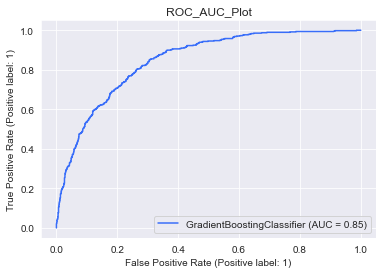

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1284
           1       0.67      0.52      0.59       477

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



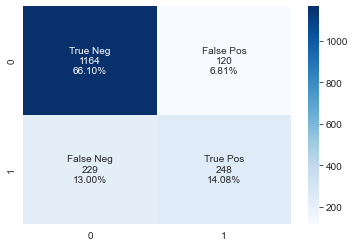

In [189]:
model_gbc=GradientBoostingClassifier()
model(model_gbc,X_train,y_train,X_test,y_test)
model_evaluation(model_gbc,X_test,y_test)

# 10.DummyClassifier

Cross Validation Score :  50.00%
ROC_AUC Score :  50.00%


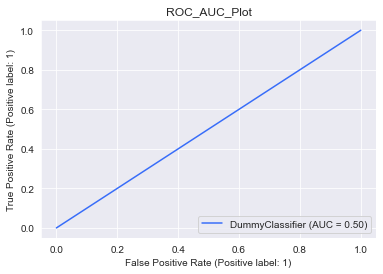

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1284
           1       0.00      0.00      0.00       477

    accuracy                           0.73      1761
   macro avg       0.36      0.50      0.42      1761
weighted avg       0.53      0.73      0.61      1761



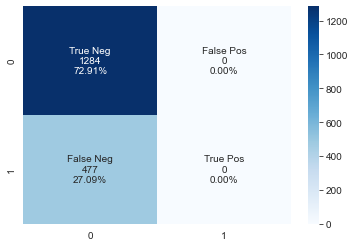

In [190]:
model_dc=DummyClassifier()
model(model_dc,X_train,y_train,X_test,y_test)
model_evaluation(model_dc,X_test,y_test)

# Hyperparameter tuning using gridsearchcv

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
model_lr=LogisticRegression(solver='liblinear')
param={'C':(0.2,0.3,0.35,0.45,0.55),'fit_intercept':('True','False')}
clf=GridSearchCV(model_lr,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.2, 0.3, 0.35, 0.45, 0.55),
                         'fit_intercept': ('True', 'False')})

In [193]:
#find the best params
clf.best_params_

{'C': 0.2, 'fit_intercept': 'True'}

In [194]:
#print the best score
clf.best_score_

0.804427374501878

In [195]:
grid_search=LogisticRegression(C= 0.2, penalty= 'l1', solver= 'liblinear')
grid_search.fit(X_train,y_train)

LogisticRegression(C=0.2, penalty='l1', solver='liblinear')

Cross Validation Score :  85.00%
ROC_AUC Score :  71.70%


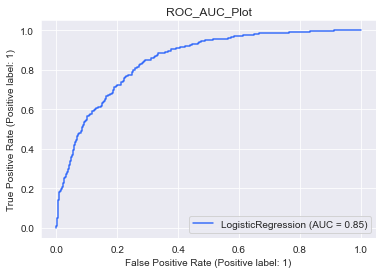

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1284
           1       0.69      0.52      0.59       477

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



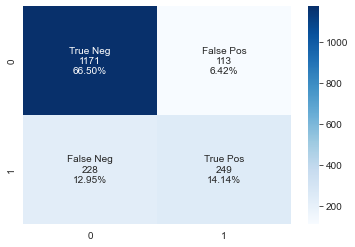

In [201]:
grid_search=LogisticRegression(C= 0.2, penalty= 'l1', solver= 'liblinear')
grid_search.fit(X_train,y_train)
y_pred1=grid_search.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(grid_search,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred1)))
plot_roc_curve(grid_search, X_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

cm = confusion_matrix(y_test,grid_search.predict(X_test))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
# Classification Report
print(classification_report(y_test,grid_search.predict(X_test)))

## after tuning its accuracy has increased by very small margin.

# saving the model

In [203]:
import pickle
filename='customerchurn.pkl'
pickle.dump(model_lr,open(filename,'wb'))